#  EDA AND MACHINE LEARNING -  AVOCADO  DATA SET

In [45]:
%%html
<img src = "avocado.JPG", width = 600, height = 550>


### 1. Problem Statement

It is a Data Set of __Aocado__. Here we have to find the how the sales of Avocado depends upon the various factors like
- 1 at their PLU codes.
- 2 on the Average Price
- 3 On their types
- and so on...........


## 2. Loading the Data set and Description 

### 2.1  Importing Packages

In [1]:
import pandas as pd 
import pandas_profiling
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn import metrics

### 2.2 Data Loading and Description

This Data Set is Avocado Sale. We have Average Price , Volume sold, Avocado sold with PLU codes. Here PLU stands for Price Look up code. Which was a Tag we usually see on Fruit. that shows us that fruit os Organic or Conventional one. We have Columns of how many bags avocado sold and their types.  

In [2]:
avocado = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")

## 3.  Data Profiling

### 3.1 About the data

In [4]:
avocado.shape

(18249, 14)

In [5]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [8]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### 3.2 Pre Profiling

In [20]:
profile = pandas_profiling.ProfileReport(avocado)
profile.to_file("avocado_before.html")

### 3.3 Data Processing


In [3]:
avocado_new = avocado.drop(['Unnamed: 0','Date'], axis = 1, inplace = False) 
sum_PLU = avocado_new['4046']+avocado_new['4225'] + avocado['4770']
#sum_PLU.head()
sub = avocado_new['Total Volume'] - sum_PLU 

avocado_new.insert(5,'RestVol', sub)
avocado_new.head()

,AveragePrice,Total Volume,4046,4225,4770,RestVol,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
avocado_new['region'].nunique()


54

In [8]:
avocado_new.describe()

,AveragePrice,Total Volume,4046,4225,4770,RestVol,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396413e+05,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862428e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.547474e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### 3.4 Post Profiling

In [21]:
profile = pandas_profiling.ProfileReport(avocado_new)
profile.to_file('avocado_after.html')

### 4.  EDA

### 4.1 In which range price of avocado is distributed maximum?

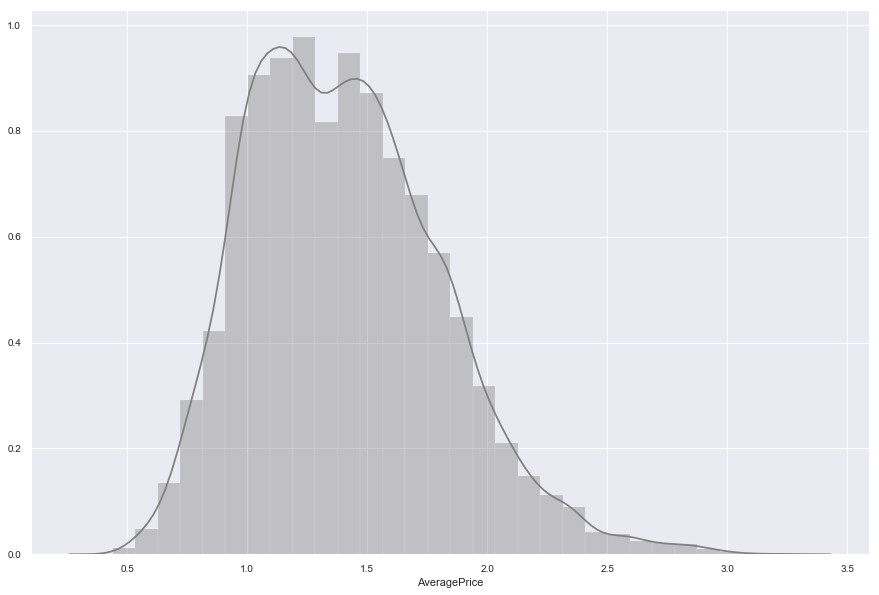

In [58]:
plt.figure(figsize= (15,10))
sns.set_style('darkgrid')
sns.distplot(avocado_new['AveragePrice'], bins = 30, color = 'grey')

Average price lies between __0.90__ to __1.60__

###  4.1  In which country avocados  average price is maximum?

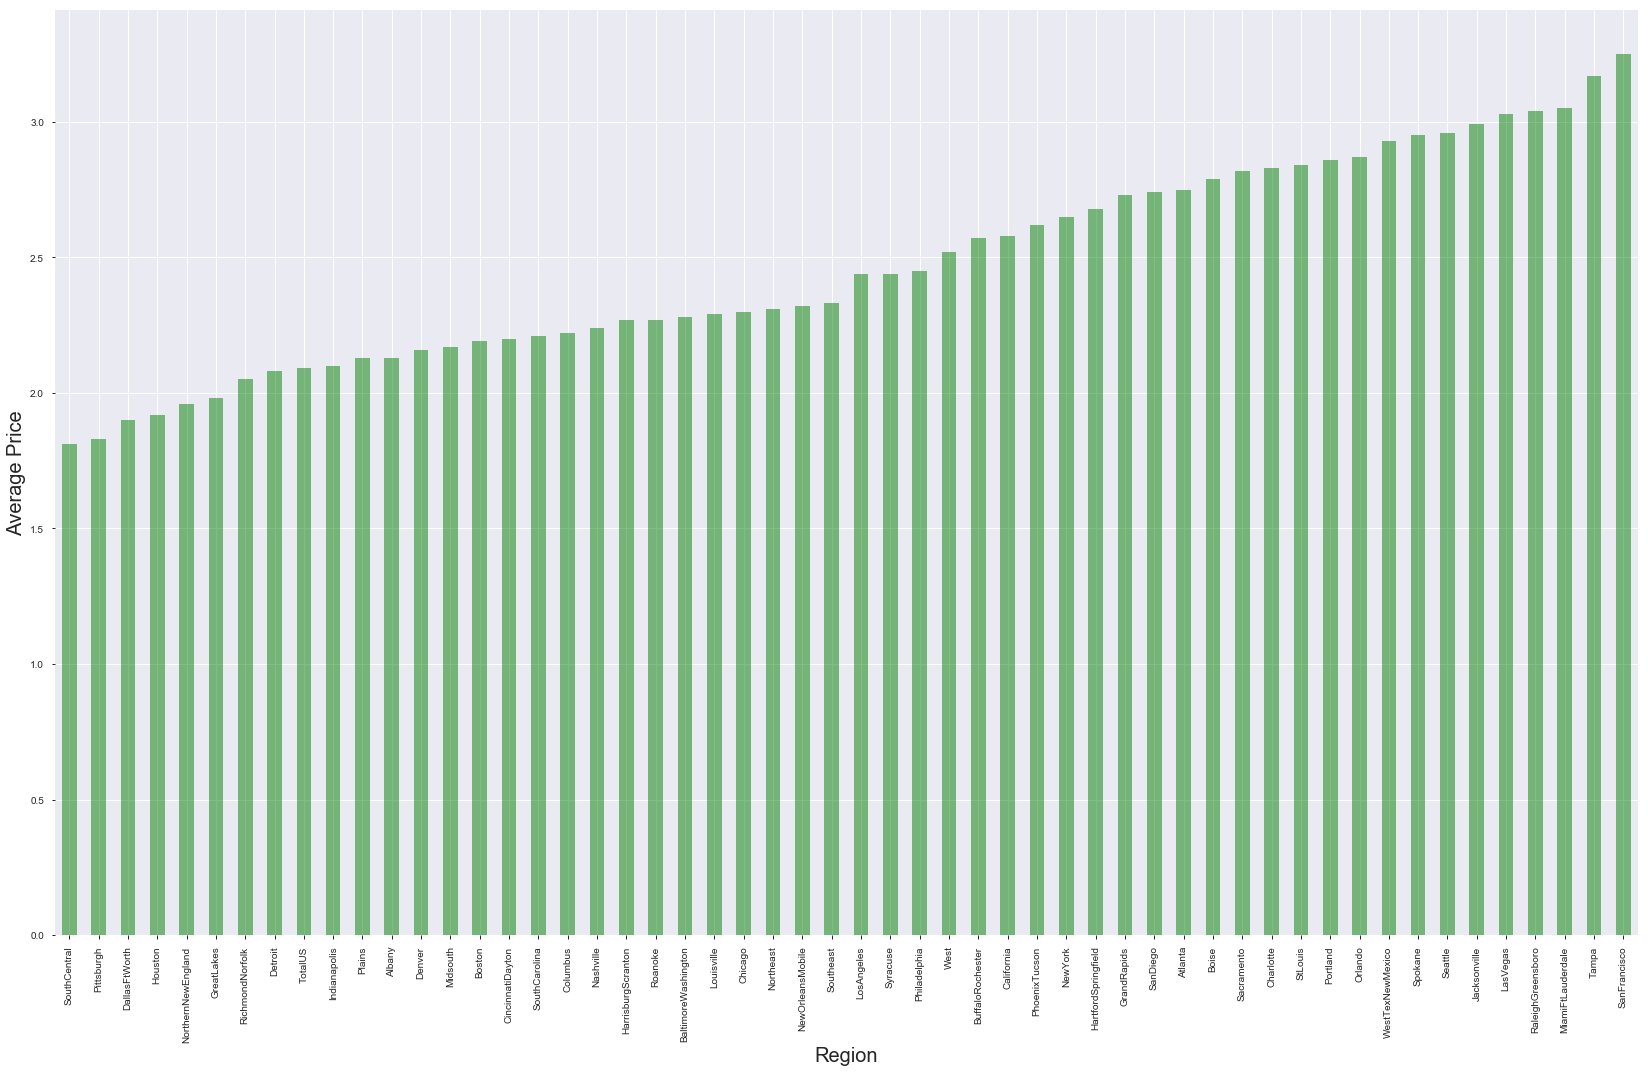

In [5]:
#avocado_reg = avocado_new.set_index(['region'],inplace = False)
avocado_reg_max = avocado_new.groupby(['region']).max()
ax =  avocado_reg_max['AveragePrice'].sort_values(ascending  =True).plot(kind ='bar',figsize = (23,15),color = 'green', alpha = 0.5)
for p in ax.patches:
    ab.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),color = 'green')
plt.xlabel('Region', fontsize = 20)
plt.ylabel('Average Price', fontsize = 20)
plt.tight_layout()

### Max price in top 3 region
1.   SanFrancisco       - 3.25
2.   Tampa              - 3.17
3.   MiamiFtLauderale   - 3.05

### 4.2 where the mean Average price in different region?

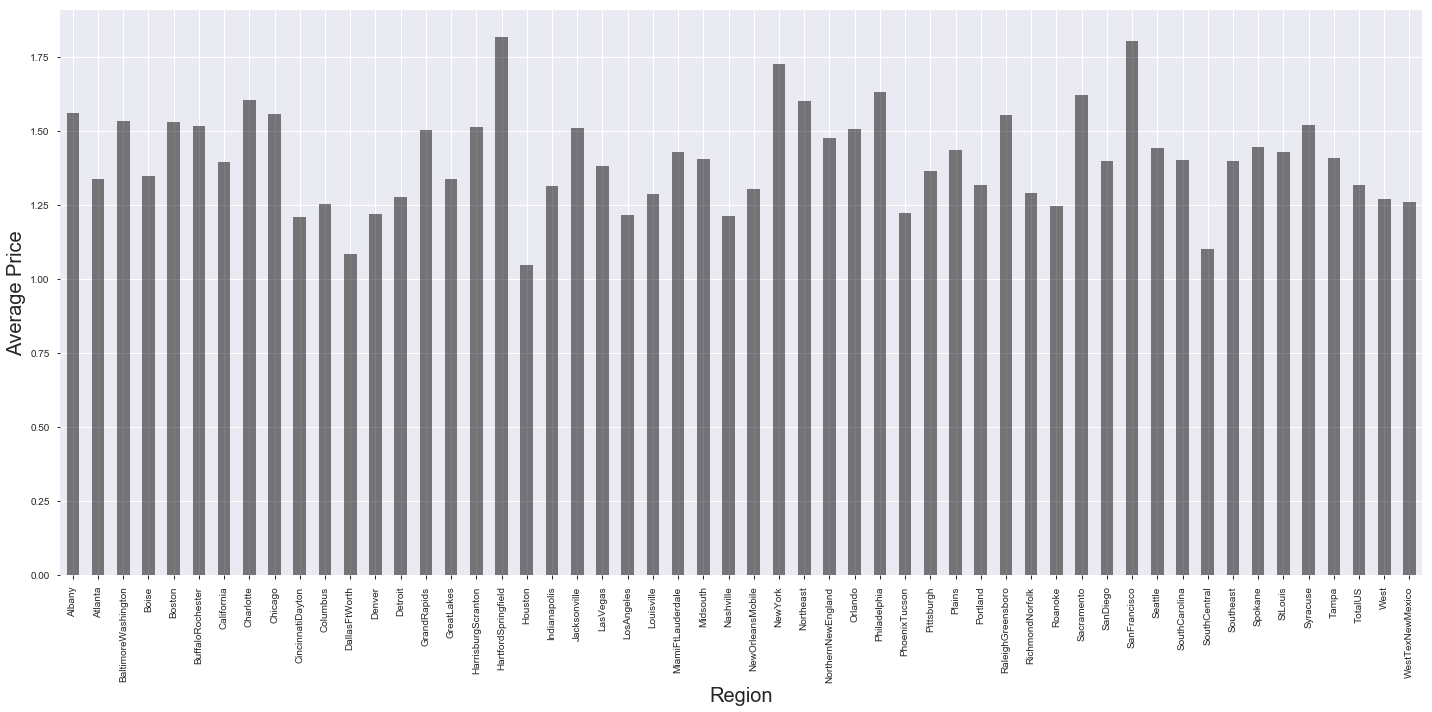

In [6]:
#avocado_reg = avocado_new.set_index(['region'],inplace = False)
avocado_reg_mean = avocado_new.groupby(['region']).mean()
ax = avocado_reg_mean['AveragePrice'].plot.bar(figsize = (20,10), color = 'black', alpha = 0.5 )
#for p in ax.patches:
    #ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),color = 'black')
plt.xlabel('Region', fontsize = 20)
plt.ylabel('Average Price', fontsize = 20)
plt.tight_layout()

### we have mean price in top 3 region
1.    HartfordSpringfield
2.    SanFrancisco
3.    NewYork

### 4.3  Regions having minimum average prices?

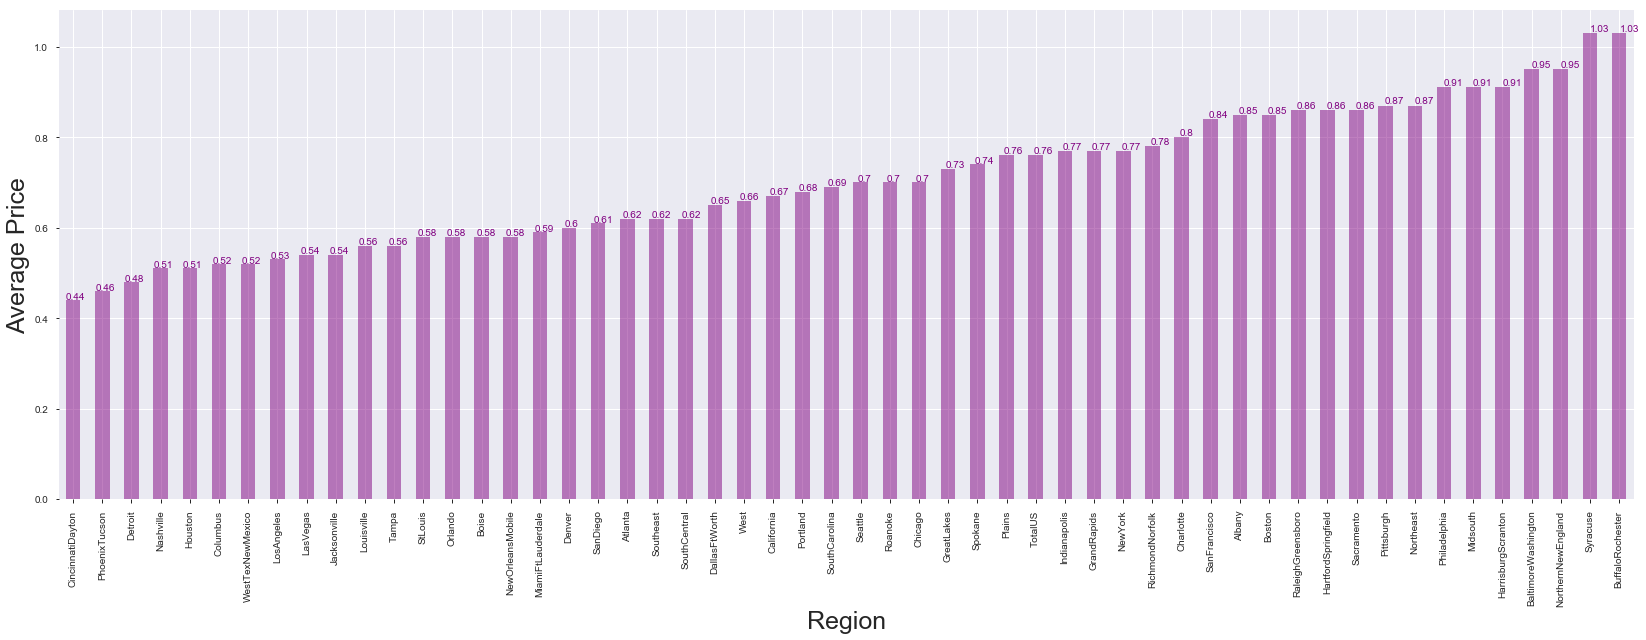

In [7]:
#avocado_reg = avocado_new.set_index(['region'],inplace = False)
avocado_reg_min = avocado_new.groupby(['region']).min()
ax = avocado_reg_min['AveragePrice'].sort_values(ascending= True).plot.bar(figsize = (23,9), color = 'purple', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),color = 'purple')
plt.xlabel('Region', fontsize = 25)
plt.ylabel('Average Price', fontsize = 25)
plt.tight_layout()

### Min price in 3 region
1.   CincinnatiDayton - 0.44
2.   PhoenixTucson    - 0.46
3.   Detroit          - 0.48

### 4.5  Where the maximum Bags of avocado are sold?  

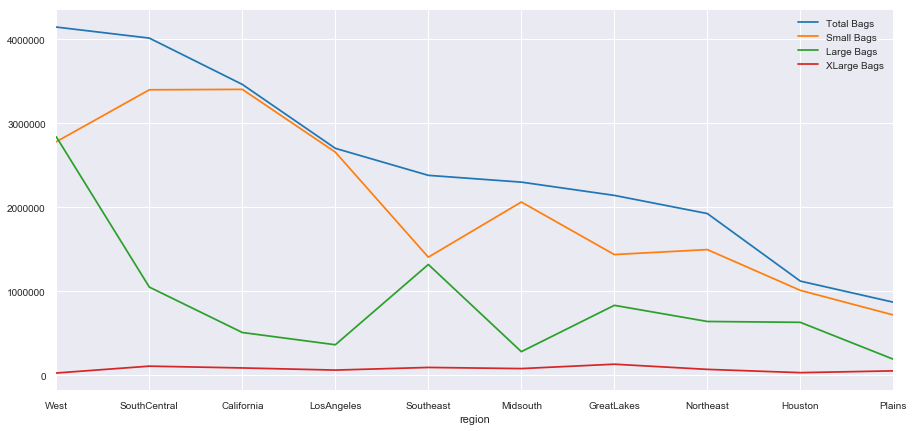

In [9]:
avocado_bags = avocado_new.loc[:,'Total Bags':]
avocado_bags_nyear = avocado_bags.drop('year', axis =1)
avocado_bags_nyear.set_index('region', inplace = False)
x = avocado_bags_nyear.groupby(['region']).max().sort_values(by = ['Total Bags'], ascending = False)
xy = x.drop('TotalUS', axis = 0)
xy.head(10).plot.line(figsize = (15,7), )

__Maximum__ Bags are sold in:

1.  West
2.  SouthCentral
3.  California


### 4.6 average bags of avocados sold in different regions?

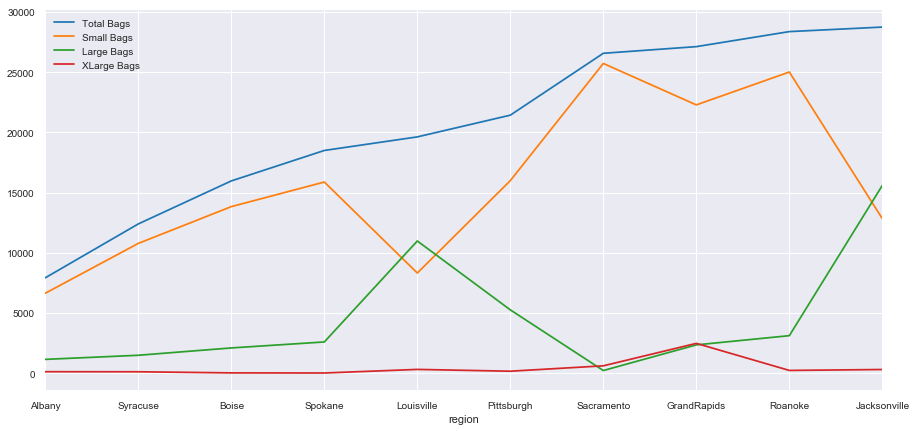

In [10]:
x = avocado_bags_nyear.groupby(['region']).mean().sort_values(by = ['Total Bags'], ascending = True)
x.head(10).plot.line(figsize = (15,7) )

__Average__ Bags are sold in:

1.  Jacksonville
2.  Roanoke
3.  GrandRepids

## Correlations between different factors.

In [12]:
avocado_new.corr()

,AveragePrice,Total Volume,4046,4225,4770,RestVol,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177087,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920056,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.792314,0.802733,0.698471,0.679861,-0.036531
RestVol,-0.177087,0.963047,0.920056,0.905787,0.792314,1.000000,1.000000,0.994335,0.943009,0.804232,0.071555
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804232,0.804233,0.806845,0.710858,1.000000,0.081033


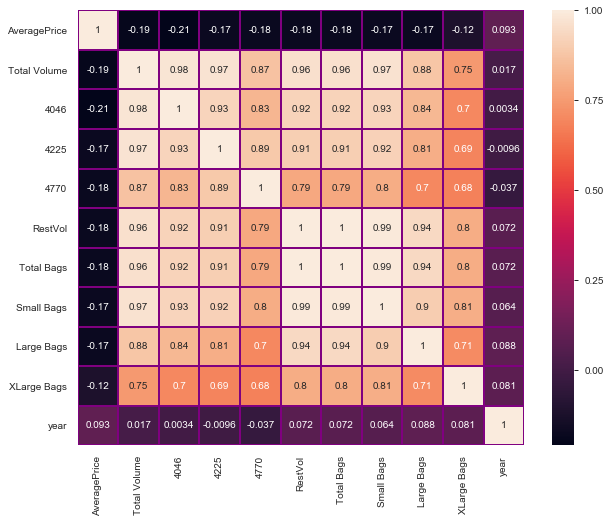

In [11]:
plt.figure(figsize= (10,8))
sns.heatmap(avocado_new.corr(), annot = True, linewidth = 1 , linecolor = 'purple')

In [12]:
avocado_new1 =  avocado_new.iloc[:,:10]
avocado_new1.head()
#avocado_new1.insert(10,'type', avocado_new['type'])
#avocado_new1.head()

,AveragePrice,Total Volume,4046,4225,4770,RestVol,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,6183.95,5986.26,197.69,0.0


#### correlation between Total Volume and PLU codes and Noramal avocados

C:\Users\abc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


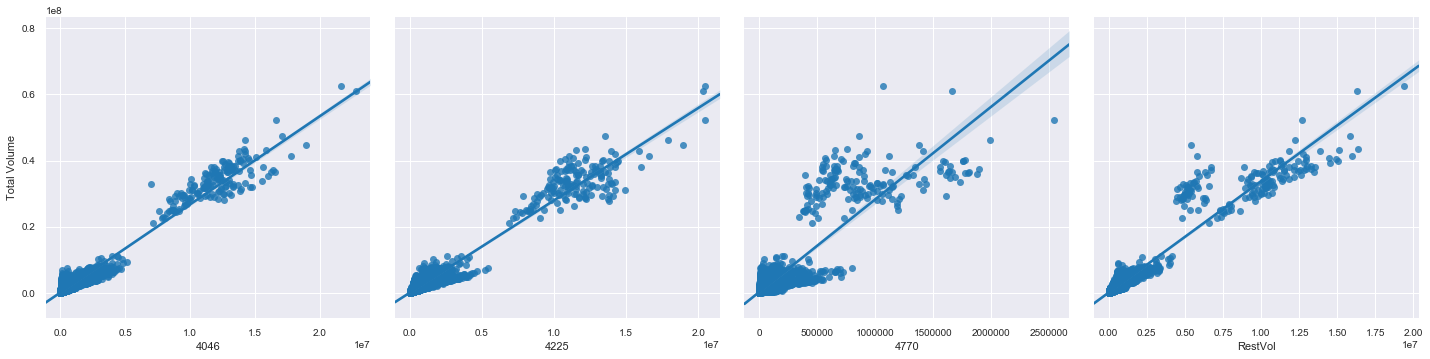

In [13]:
sns.pairplot(data = avocado_new, x_vars = ['4046','4225','4770', 'RestVol'], y_vars= 'Total Volume',size = 5, aspect = 1, kind= 'reg')

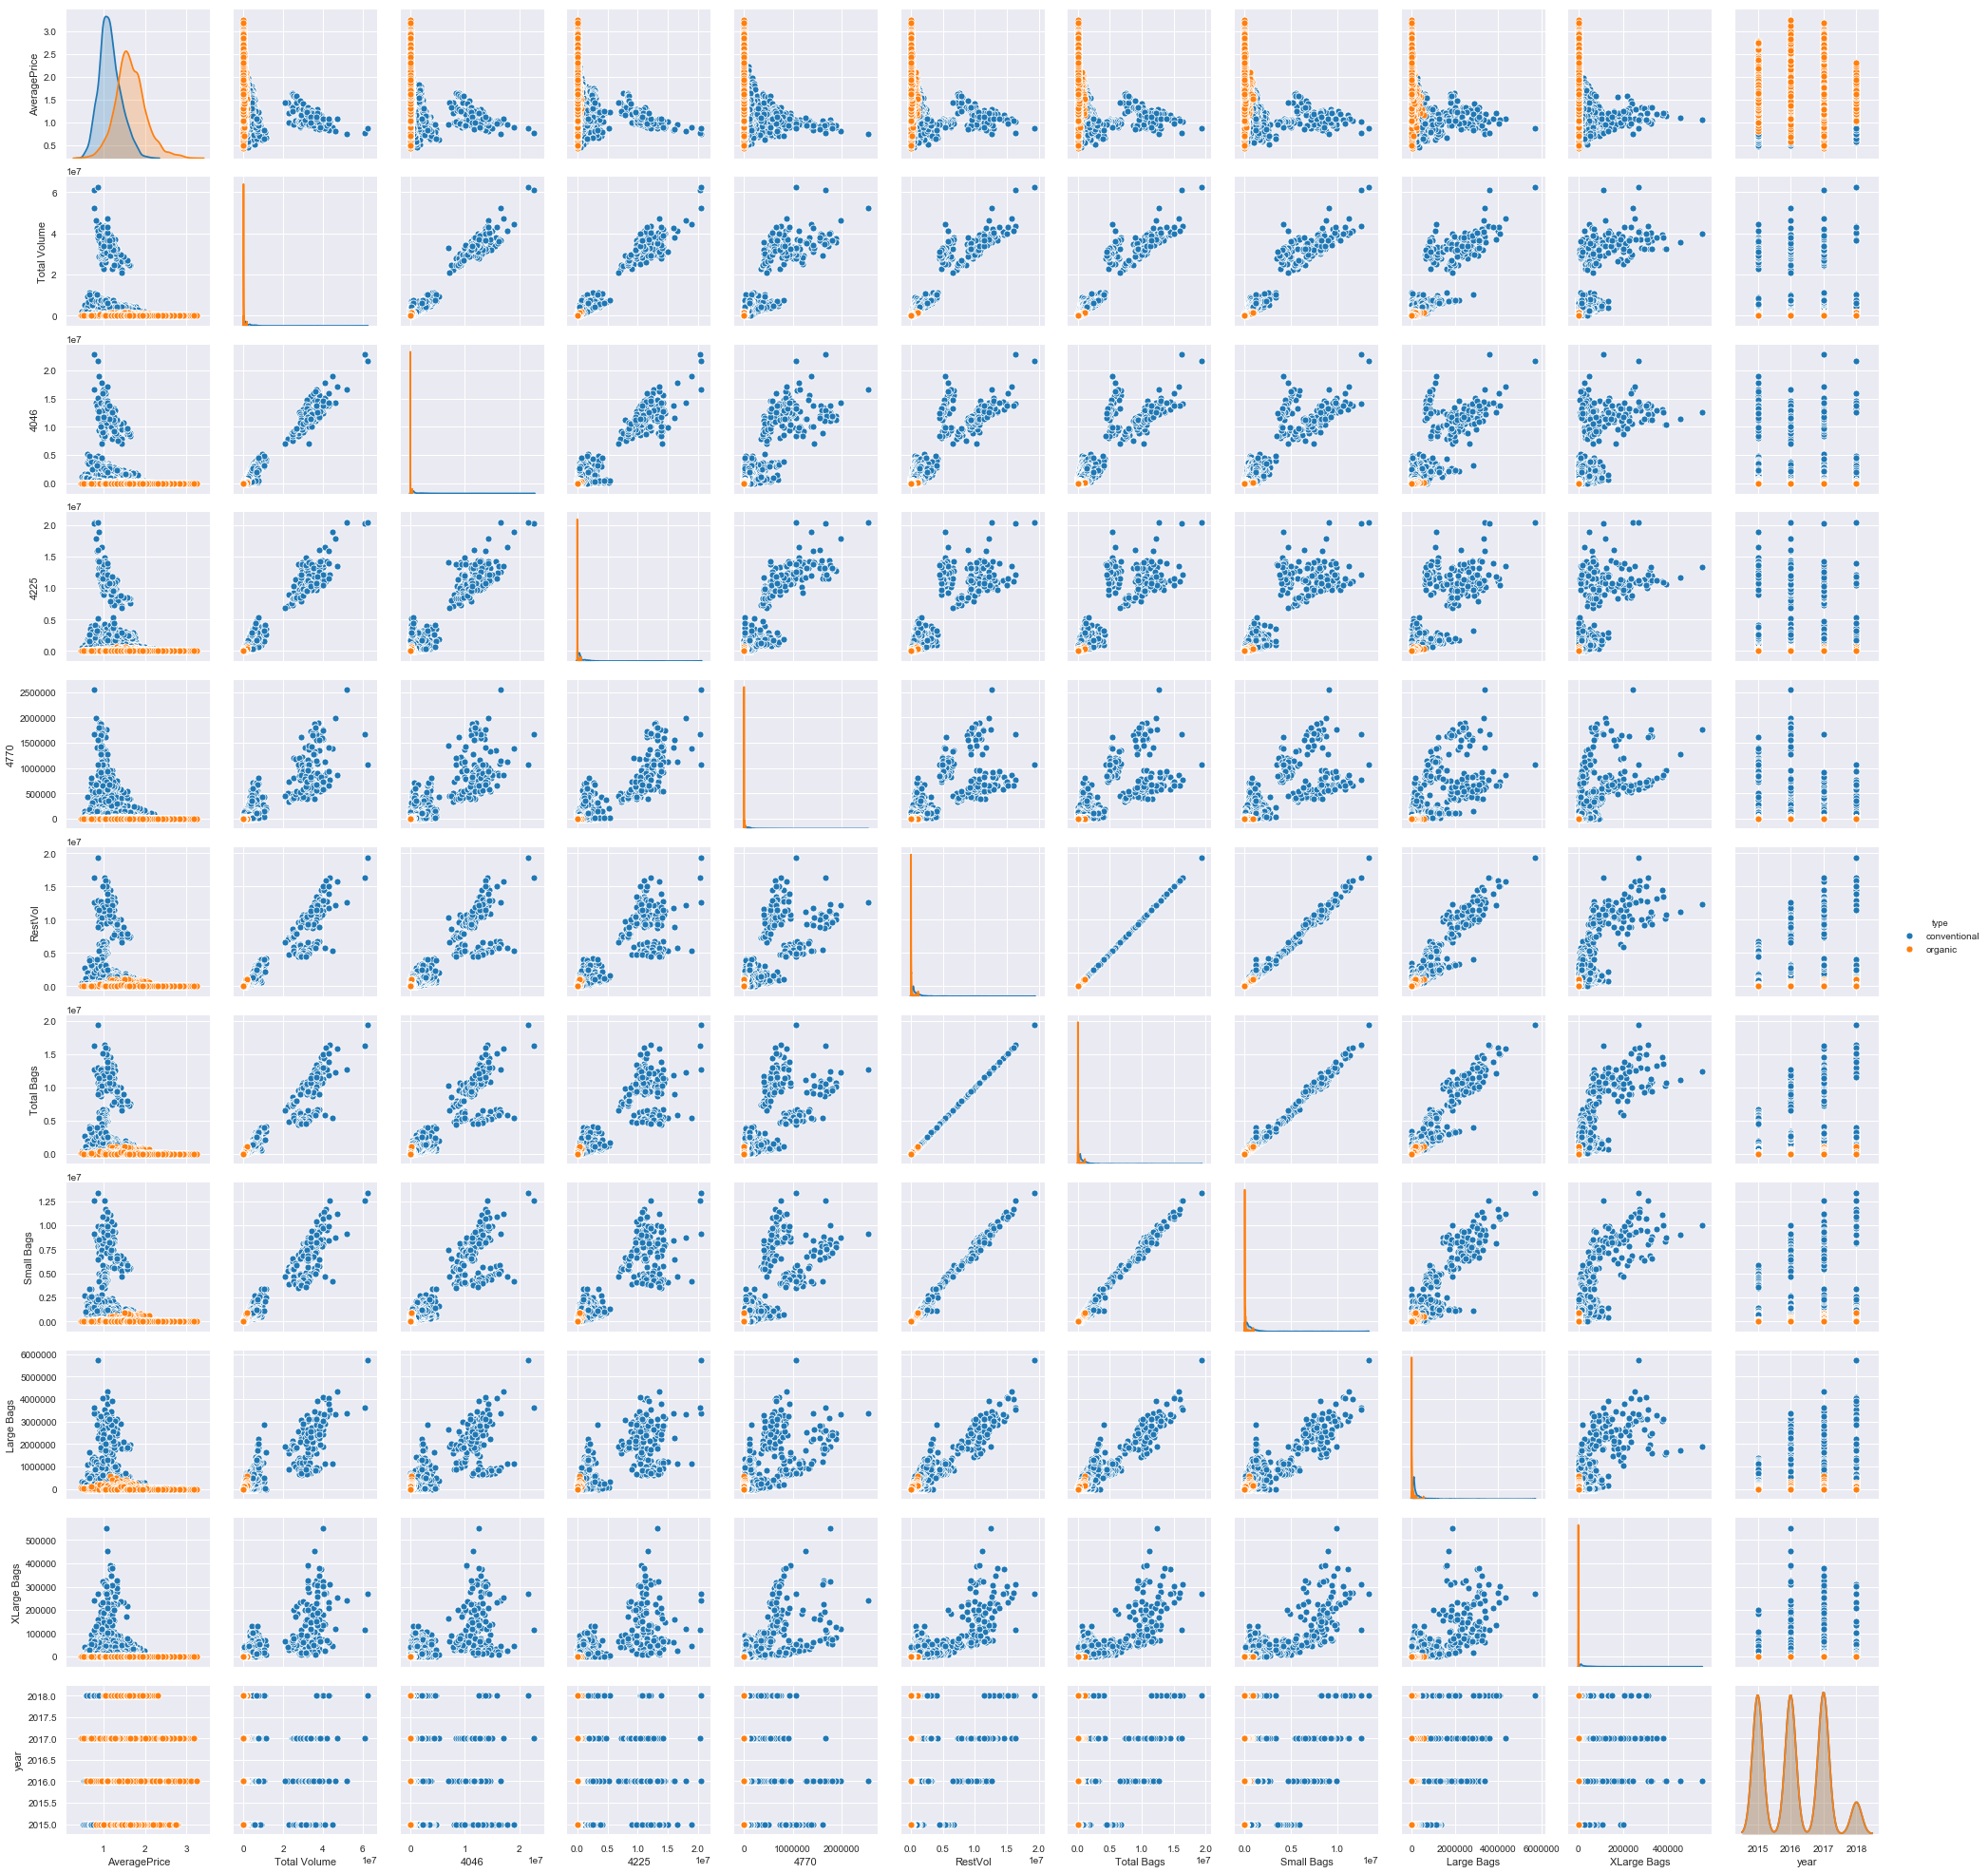

In [14]:
sns.pairplot(data = avocado_new , hue = 'type')


#### Use Linear REGression 

In [15]:
from sklearn.preprocessing  import StandardScaler
scalers = StandardScaler().fit(avocado_new1)
data    = scalers.transform(avocado_new1)    


In [16]:
avocado_new1 = pd.DataFrame(data)
avocado_new1.head()
avocado_new1.columns = ['AvgPrice','TotalVol','4046','4225','4770','RestVol', 'TotalBags','SmallBags', 'LargeBags','XLBags']
avocado_new1.head()

,AvgPrice,TotalVol,4046,4225,4770,RestVol,TotalBags,SmallBags,LargeBags,XLBags
0,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234172,-0.234170,-0.232647,-0.222352,-0.17558
1,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233352,-0.233350,-0.231568,-0.222335,-0.17558
2,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234732,-0.234730,-0.233399,-0.222311,-0.17558
3,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237098,-0.237096,-0.236568,-0.222186,-0.17558
4,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236720,-0.236718,-0.236154,-0.221924,-0.17558


In [17]:
avocado_new1.corr()

,AvgPrice,TotalVol,4046,4225,4770,RestVol,TotalBags,SmallBags,LargeBags,XLBags
AvgPrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177087,-0.177088,-0.174730,-0.172940,-0.117592
TotalVol,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.963047,0.967238,0.880640,0.747157
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920056,0.920057,0.925280,0.838645,0.699377
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.905787,0.916031,0.810015,0.688809
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.792314,0.802733,0.698471,0.679861
RestVol,-0.177087,0.963047,0.920056,0.905787,0.792314,1.000000,1.000000,0.994335,0.943009,0.804232
TotalBags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,1.000000,0.994335,0.943009,0.804233
SmallBags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,0.994335,1.000000,0.902589,0.806845
LargeBags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.943009,0.902589,1.000000,0.710858
XLBags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804232,0.804233,0.806845,0.710858,1.000000


In [18]:
avocado_new1.insert(10,'type', avocado_new['type'])
avocado_new1.head()

,AvgPrice,TotalVol,4046,4225,4770,RestVol,TotalBags,SmallBags,LargeBags,XLBags,type
0,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234172,-0.234170,-0.232647,-0.222352,-0.17558,conventional
1,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233352,-0.233350,-0.231568,-0.222335,-0.17558,conventional
2,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234732,-0.234730,-0.233399,-0.222311,-0.17558,conventional
3,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237098,-0.237096,-0.236568,-0.222186,-0.17558,conventional
4,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236720,-0.236718,-0.236154,-0.221924,-0.17558,conventional


In [19]:
avo_dummies  = pd.get_dummies(avocado_new1.type, prefix = 'type')
avo_dummy = avo_dummies.iloc[:,:1]

In [20]:
avocado_new2 = pd.concat([avocado_new1, avo_dummy],axis =1)
avocado_new2.tail()


,AvgPrice,TotalVol,4046,4225,4770,RestVol,TotalBags,SmallBags,LargeBags,XLBags,type,type_conventional
18244,0.556347,-0.241373,-0.230017,-0.243857,-0.212540,-0.229303,-0.229301,-0.226665,-0.220964,-0.17558,organic,0
18245,0.755023,-0.242296,-0.230693,-0.242277,-0.212540,-0.233596,-0.233594,-0.232196,-0.221403,-0.17558,organic,0
18246,1.152375,-0.242331,-0.230693,-0.243090,-0.205766,-0.233465,-0.233463,-0.231644,-0.222561,-0.17558,organic,0
18247,1.301382,-0.241625,-0.230428,-0.242651,-0.205774,-0.231868,-0.231866,-0.229543,-0.222529,-0.17558,organic,0
18248,0.531512,-0.241253,-0.229347,-0.243170,-0.210450,-0.230809,-0.230807,-0.228111,-0.222628,-0.17558,organic,0


In [21]:
x=['AvgPrice','4046','4770','RestVol','TotalBags','SmallBags','LargeBags','XLBags','type_conventional']
indp_col = avocado_new2[x]
y = ['TotalVol']
dep_col = avocado_new2[y]
print(indp_col.shape)
print(dep_col.shape)

(18249, 9)
(18249, 1)


In [22]:
from sklearn.model_selection import train_test_split
def split(indp_col,dep_col):
    return train_test_split(indp_col,dep_col, test_size = .20, random_state = 1)

In [23]:
indp_train, indp_test, dep_train, dep_test = split(indp_col, dep_col)
print("indp column train shape", indp_train.shape)
print("indp column test shape ", indp_test.shape)
print("dep column train shape", dep_train.shape)
print("dep column test shape", dep_test.shape)


indp column train shape (14599, 9)
indp column test shape  (3650, 9)
dep column train shape (14599, 1)
dep column test shape (3650, 1)


In [26]:
def linear_reg(a,b):
    a_train, a_test, b_train, b_test =split(a,b)
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(a_train,b_train)
    return linreg

In [27]:
linreg = linear_reg(indp_col, dep_col)

In [28]:
print('intercept', linreg.intercept_)
print('coefficient', linreg.coef_)

intercept [-0.01216601]
coefficient [[ 1.34746291e-02  4.74322022e-01  1.57600793e-01 -2.41592972e+01
  -2.02737133e+04  1.53575048e+04  5.02111749e+03  3.64094041e+02
   2.37214287e-02]]


In [29]:
dep_pred_train = linreg.predict(indp_train)
dep_pred_test =  linreg.predict(indp_test)

In [30]:
MAE_train = metrics.mean_absolute_error(dep_train,dep_pred_train)
MAE_test = metrics.mean_absolute_error(dep_test,dep_pred_test)

In [31]:
print("MAE for training set is {}" .format(MAE_train))
print("MAE for testing set is {}" .format(MAE_test))

MAE for training set is 0.03681981848834804
MAE for testing set is 0.03887115411565372


In [32]:
MSE_train = metrics.mean_squared_error(dep_train,dep_pred_train)
MSE_test = metrics.mean_squared_error(dep_test, dep_pred_test)
print("MSE for training set is {}" .format(MSE_train))
print("MSE for testing set is {}" .format(MSE_test))

MSE for training set is 0.008836839862555726
MSE for testing set is 0.009854935791574536


In [33]:
RSME_train = np.sqrt(metrics.mean_squared_error(dep_train, dep_pred_train))
RSME_test = np.sqrt(metrics.mean_squared_error(dep_test,dep_pred_test))
print("RSME for training set is {}" .format(RSME_train))
print("RSME for testing set is {}".format(RSME_test))

RSME for training set is 0.09400446724786926
RSME for testing set is 0.09927202925081433


####  Creat a different Model and apply Linear Regression

In [34]:
avocado_new3 = avocado_new2.drop(['RestVol','SmallBags','LargeBags','XLBags'],axis = 1)
avocado_new3.head()

,AvgPrice,TotalVol,4046,4225,4770,TotalBags,type,type_conventional
0,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,conventional,1
1,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,conventional,1
2,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,conventional,1
3,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,conventional,1
4,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,conventional,1


In [35]:
avocado_new3.corr()

,AvgPrice,TotalVol,4046,4225,4770,TotalBags,type_conventional
AvgPrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.615845
TotalVol,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.232434
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.225819
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.232289
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.210027
TotalBags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.217788
type_conventional,-0.615845,0.232434,0.225819,0.232289,0.210027,0.217788,1.000000


In [36]:
x=['AvgPrice','4046','4770','TotalBags','type_conventional']
indp_col1 = avocado_new2[x]
y = ['TotalVol']
dep_col1 = avocado_new2[y]
print(indp_col1.shape)
print(dep_col1.shape)

(18249, 5)
(18249, 1)


In [37]:
from sklearn.model_selection import train_test_split
def split(indp_col1,dep_col1):
    return train_test_split(indp_col1,dep_col1, test_size = .30, random_state = 1)

In [38]:
indp1_train, indp1_test, dep1_train, dep1_test = split(indp_col1, dep_col1)
print("indp column train shape", indp1_train.shape)
print("indp column test shape ", indp1_test.shape)
print("dep column train shape", dep1_train.shape)
print("dep column test shape", dep1_test.shape)

indp column train shape (12774, 5)
indp column test shape  (5475, 5)
dep column train shape (12774, 1)
dep column test shape (5475, 1)


In [39]:
def linear_reg(a,b):
    a_train, a_test, b_train, b_test =split(a,b)
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(a_train,b_train)
    return linreg

In [40]:
linreg = linear_reg(indp_col1, dep_col1)

In [41]:
print('intercept', linreg.intercept_)
print('coefficient', linreg.coef_)

intercept [-0.01329739]
coefficient [[0.01463325 0.51028591 0.1524591  0.37117877 0.02546385]]


In [42]:
dep1_pred_train = linreg.predict(indp1_train)
dep1_pred_test =  linreg.predict(indp1_test)

In [52]:
MAE_train = metrics.mean_absolute_error(dep1_train,dep1_pred_train)
MAE_test = metrics.mean_absolute_error(dep1_test,dep1_pred_test)

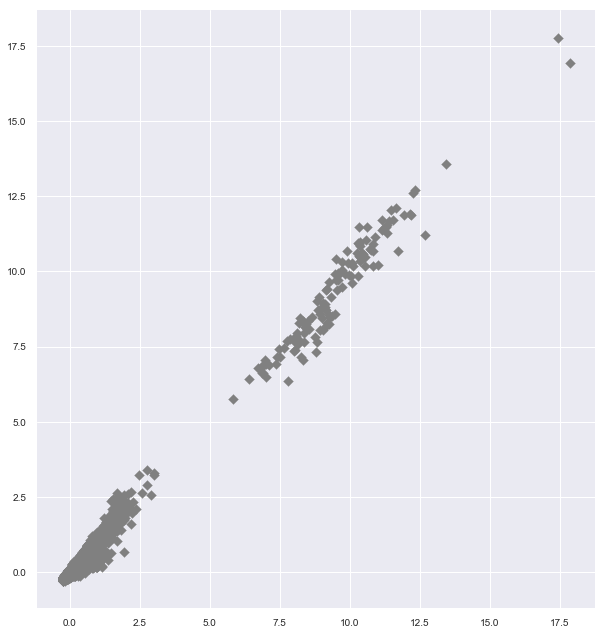

In [54]:
plt.figure(figsize = (10,11))
ax = plt.scatter(x = dep_train, y = dep_pred_train, color = 'grey', marker = 'D')

In [48]:
print("MAE for training set is {}" .format(MAE_train))
print("MAE for testing set is {}" .format(MAE_test))

MAE for training set is 0.038548115883867716
MAE for testing set is 0.04065110574372349


In [49]:
MSE_train = metrics.mean_squared_error(dep1_train,dep1_pred_train)
MSE_test = metrics.mean_squared_error(dep1_test, dep1_pred_test)
print("MSE for training set is {}" .format(MSE_train))
print("MSE for testing set is {}" .format(MSE_test))

MSE for training set is 0.00995807465903311
MSE for testing set is 0.011004648459438363


In [50]:
RSME_train = np.sqrt(metrics.mean_squared_error(dep1_train, dep1_pred_train))
RSME_test = np.sqrt(metrics.mean_squared_error(dep1_test,dep1_pred_test))
print("RSME for training set is {}" .format(RSME_train))
print("RSME for testing set is {}".format(RSME_test))

RSME for training set is 0.09979015311659317
RSME for testing set is 0.1049030431371672
